##### 전처리

In [77]:
from tqdm import tqdm
tqdm.pandas()
#data['doc']=data['doc'].progress_apply(lambda x : clean_text(x))

In [78]:
import pandas as pd
import numpy as np

In [79]:
#크롤링 데이터 불러오기
#본인이 크롤링한 파일 업로드
data=pd.read_csv('기업데이터(30)_잡플래닛.csv', encoding='utf-8-sig')
data

,Unnamed: 0,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점
0,0,네이버,2022. 11,디자인,전직원,3점,"""커리어 경력 쌓고 싶은 사람에게 추천,,""",수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다
1,1,네이버,2022. 11,전문직,전직원,4점,"""자유로운 복장, 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야...",저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...
2,2,네이버,2022. 11,IT/인터넷,현직원,4점,"""워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업\n앞으로도 가장 전망이 좋은...","네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임
3,3,네이버,2022. 11,IT/인터넷,현직원,4점,"""개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위""",개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...
4,4,네이버,2022. 10,IT/인터넷,전직원,5점,"""아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다""","휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음
...,...,...,...,...,...,...,...,...,...,...
60612,443,여기어때,2014. 12,IT/인터넷,전직원,4점,"""돈은 있다! 성장을 원한다! 높은 보상을 원한다면 도전해보라!""","조직원 평균연령이 젊음(그만큼 사고가 깨어있음), 분위기 자체가 열정이 있음","일과 삶의 균형을 원한다면 비추, 안정적인 직장을 원한다면 비추(문화 자체가 안주하...",수고하세요
60613,444,여기어때,2014. 11,IT/인터넷,전직원,4점,"""자율적인 분위기, 깨어있는 조직문화, 안정적인 회사를 원하면 지원해도됨""",경영진의 마인드는 깨어있음. 열심히 하고자 하는 이에게 후하고 자기 식구들을 챙길 ...,사내의 위계질서가 너무 잡혀 있음. 팀내간의 경쟁도 심한 편. 연봉이 업계 수준이라...,건승하시길.
60614,445,여기어때,2014. 11,IT/인터넷,전직원,3점,"BEST\n""일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 ...",젊은 분위기. 으쌰으쌰하는 분위기는 좋았던 거 같음\n인사 시스템 같은거는 어설프지...,"월급 적음. 야근 많고, 주말근무 하는 분위기",귀찮다
60615,446,여기어때,2014. 10,IT/인터넷,현직원,2점,"""젊은 분위기, 야근 많고, 주말근무도 많음, 월급은 적음""","작은 규모이지만 비전을 가지고 움직이며, 미래가 밝아보입니다.\n사장님의 마인드가 ...",성장세에 있다보니 정책에 변화가 잦습니다.,항상 감사합니다.


In [80]:
#필요없는 컬럼 삭제
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60617 entries, 0 to 60616
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   회사           60617 non-null  object
 1   날짜           60617 non-null  object
 2   직무           60617 non-null  object
 3   재직여부         60617 non-null  object
 4   별점           60617 non-null  object
 5   요약           60617 non-null  object
 6   장점           60617 non-null  object
 7   단점           60617 non-null  object
 8   경영진에게 바라는 점  60573 non-null  object
dtypes: object(9)
memory usage: 4.2+ MB


In [81]:
data

,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점
0,네이버,2022. 11,디자인,전직원,3점,"""커리어 경력 쌓고 싶은 사람에게 추천,,""",수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다
1,네이버,2022. 11,전문직,전직원,4점,"""자유로운 복장, 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야...",저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...
2,네이버,2022. 11,IT/인터넷,현직원,4점,"""워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업\n앞으로도 가장 전망이 좋은...","네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임
3,네이버,2022. 11,IT/인터넷,현직원,4점,"""개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위""",개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...
4,네이버,2022. 10,IT/인터넷,전직원,5점,"""아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다""","휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음
...,...,...,...,...,...,...,...,...,...
60612,여기어때,2014. 12,IT/인터넷,전직원,4점,"""돈은 있다! 성장을 원한다! 높은 보상을 원한다면 도전해보라!""","조직원 평균연령이 젊음(그만큼 사고가 깨어있음), 분위기 자체가 열정이 있음","일과 삶의 균형을 원한다면 비추, 안정적인 직장을 원한다면 비추(문화 자체가 안주하...",수고하세요
60613,여기어때,2014. 11,IT/인터넷,전직원,4점,"""자율적인 분위기, 깨어있는 조직문화, 안정적인 회사를 원하면 지원해도됨""",경영진의 마인드는 깨어있음. 열심히 하고자 하는 이에게 후하고 자기 식구들을 챙길 ...,사내의 위계질서가 너무 잡혀 있음. 팀내간의 경쟁도 심한 편. 연봉이 업계 수준이라...,건승하시길.
60614,여기어때,2014. 11,IT/인터넷,전직원,3점,"BEST\n""일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 ...",젊은 분위기. 으쌰으쌰하는 분위기는 좋았던 거 같음\n인사 시스템 같은거는 어설프지...,"월급 적음. 야근 많고, 주말근무 하는 분위기",귀찮다
60615,여기어때,2014. 10,IT/인터넷,현직원,2점,"""젊은 분위기, 야근 많고, 주말근무도 많음, 월급은 적음""","작은 규모이지만 비전을 가지고 움직이며, 미래가 밝아보입니다.\n사장님의 마인드가 ...",성장세에 있다보니 정책에 변화가 잦습니다.,항상 감사합니다.


In [82]:
len(data)

60617

In [83]:
data.isnull().sum()

회사              0
날짜              0
직무              0
재직여부            0
별점              0
요약              0
장점              0
단점              0
경영진에게 바라는 점    44
dtype: int64

In [84]:
data.dropna(inplace=True)

In [85]:
len(data)

60573

In [86]:
data

,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점
0,네이버,2022. 11,디자인,전직원,3점,"""커리어 경력 쌓고 싶은 사람에게 추천,,""",수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다
1,네이버,2022. 11,전문직,전직원,4점,"""자유로운 복장, 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야...",저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...
2,네이버,2022. 11,IT/인터넷,현직원,4점,"""워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업\n앞으로도 가장 전망이 좋은...","네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임
3,네이버,2022. 11,IT/인터넷,현직원,4점,"""개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위""",개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...
4,네이버,2022. 10,IT/인터넷,전직원,5점,"""아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다""","휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음
...,...,...,...,...,...,...,...,...,...
60612,여기어때,2014. 12,IT/인터넷,전직원,4점,"""돈은 있다! 성장을 원한다! 높은 보상을 원한다면 도전해보라!""","조직원 평균연령이 젊음(그만큼 사고가 깨어있음), 분위기 자체가 열정이 있음","일과 삶의 균형을 원한다면 비추, 안정적인 직장을 원한다면 비추(문화 자체가 안주하...",수고하세요
60613,여기어때,2014. 11,IT/인터넷,전직원,4점,"""자율적인 분위기, 깨어있는 조직문화, 안정적인 회사를 원하면 지원해도됨""",경영진의 마인드는 깨어있음. 열심히 하고자 하는 이에게 후하고 자기 식구들을 챙길 ...,사내의 위계질서가 너무 잡혀 있음. 팀내간의 경쟁도 심한 편. 연봉이 업계 수준이라...,건승하시길.
60614,여기어때,2014. 11,IT/인터넷,전직원,3점,"BEST\n""일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 ...",젊은 분위기. 으쌰으쌰하는 분위기는 좋았던 거 같음\n인사 시스템 같은거는 어설프지...,"월급 적음. 야근 많고, 주말근무 하는 분위기",귀찮다
60615,여기어때,2014. 10,IT/인터넷,현직원,2점,"""젊은 분위기, 야근 많고, 주말근무도 많음, 월급은 적음""","작은 규모이지만 비전을 가지고 움직이며, 미래가 밝아보입니다.\n사장님의 마인드가 ...",성장세에 있다보니 정책에 변화가 잦습니다.,항상 감사합니다.


In [87]:
#블로그 본문, 댓글 합쳐 하나의 document로 만들기
data['doc'] = data['요약']+ ' ' + data['장점'] + ' ' +data['단점'] + ' ' +  data['경영진에게 바라는 점']
data.head()

,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점,doc
0,네이버,2022. 11,디자인,전직원,3점,"""커리어 경력 쌓고 싶은 사람에게 추천,,""",수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다,"""커리어 경력 쌓고 싶은 사람에게 추천,,"" 수평적 사무실 분위기와 복지가 다른 곳..."
1,네이버,2022. 11,전문직,전직원,4점,"""자유로운 복장, 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야...",저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...,"""자유로운 복장, 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야..."
2,네이버,2022. 11,IT/인터넷,현직원,4점,"""워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업\n앞으로도 가장 전망이 좋은...","네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임,"""워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업\n앞으로도 가장 전망이 좋은..."
3,네이버,2022. 11,IT/인터넷,현직원,4점,"""개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위""",개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...,"""개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위"" 개발에만 집중하며 ..."
4,네이버,2022. 10,IT/인터넷,전직원,5점,"""아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다""","휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음,"""아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다"" 휴가, 연차..."


In [88]:
#data.요약 = data.요약.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.요약 = data.요약.str.replace("\s+", " ") # white space 삭제
data['요약']=data['요약'].str.replace('"', '')
data['요약']=data['요약'].str.replace(',', '')
data['요약']=data['요약'].str.replace('\n', '')
data['요약']=data['요약'].str.replace('!', '')

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11096\3589623481.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.요약 = data.요약.str.replace("\s+", " ") # white space 삭제


,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점,doc
0,네이버,2022. 11,디자인,전직원,3점,커리어 경력 쌓고 싶은 사람에게 추천,수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다,"""커리어 경력 쌓고 싶은 사람에게 추천,,"" 수평적 사무실 분위기와 복지가 다른 곳..."
1,네이버,2022. 11,전문직,전직원,4점,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...,"""자유로운 복장, 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야..."
2,네이버,2022. 11,IT/인터넷,현직원,4점,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플랫폼,"네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임,"""워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업\n앞으로도 가장 전망이 좋은..."
3,네이버,2022. 11,IT/인터넷,현직원,4점,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위,개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...,"""개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위"" 개발에만 집중하며 ..."
4,네이버,2022. 10,IT/인터넷,전직원,5점,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다,"휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음,"""아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다"" 휴가, 연차..."


In [89]:
#data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace("\s+", " ") # white space 삭제
data['doc']=data['doc'].str.replace('"', '')
data['doc']=data['doc'].str.replace(',', '')
data['doc']=data['doc'].str.replace('\n', '')
data['doc']=data['doc'].str.replace('!', '')

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11096\3970564120.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s+", " ") # white space 삭제


,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점,doc
0,네이버,2022. 11,디자인,전직원,3점,커리어 경력 쌓고 싶은 사람에게 추천,수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...
1,네이버,2022. 11,전문직,전직원,4점,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...
2,네이버,2022. 11,IT/인터넷,현직원,4점,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플랫폼,"네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...
3,네이버,2022. 11,IT/인터넷,현직원,4점,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위,개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...
4,네이버,2022. 10,IT/인터넷,전직원,5점,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다,"휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...


In [90]:
data.요약

0                                     커리어 경력 쌓고 싶은 사람에게 추천
1        자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...
2         워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플랫폼
3                        개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위
4                    아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다
                               ...                        
60612                      돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라
60613                자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨
60614    BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...
60615                         젊은 분위기 야근 많고 주말근무도 많음 월급은 적음
60616                            완벽하지는 않지만 계속해서 발전해 나가는 회사
Name: 요약, Length: 60573, dtype: object

In [91]:
data.doc

0        커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...
1        자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...
2        워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...
3        개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...
4        아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...
                               ...                        
60612    돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라 조직원 평균연령이 젊음(그...
60613    자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨 경영진의 마인드...
60614    BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...
60615    젊은 분위기 야근 많고 주말근무도 많음 월급은 적음 작은 규모이지만 비전을 가지고 ...
60616    완벽하지는 않지만 계속해서 발전해 나가는 회사 임원진의 결단이 빠르고 신속하게 진행...
Name: doc, Length: 60573, dtype: object

In [92]:
data.doc[0]

'커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다 회사 시스템에서 비효율적인 부분들이 있고 업무량이 많은 편이다 그냥 간단하게는 더 소통이 잘 되었으면 좋겠다'

In [93]:
#csv로 저장
data.to_csv("기업데이터(30)_(전처리).csv", encoding='utf-8-sig')

# 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해줍니다
- 단어로 만드는 과정에서 1)분석에 불필요한 불용어 제거 2)단어를 사전형으로 처리(가고 있다->
'가다', '있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [94]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [95]:
from konlpy.tag import Okt

In [96]:
data = pd.read_csv("기업데이터(30)_(전처리).csv", encoding='utf-8-sig')

In [97]:
#원하는 태그 추출&불용어 제거
okt = Okt()

#불용어
#한국어불용어사전 불러오기
stopwords = pd.read_csv('ko-stopwords.csv')

stopwords=list(stopwords['stopwords'])
stopwords.extend(['물론']) #불용어 추가
stopwords=set(stopwords)

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(str(string), stem=True, norm=True)#형태소 분석, 단어는 사전형으로 바꿔주기- 'Verb', 'Adverb'
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective'] if word not in stopwords]
    return words


In [98]:
print(stopwords)

{'도착하다', '이유만으로', '것과 같이', '설사', '까지 미치다', '어느 년도', '을', '하지 않도록', '한항목', '당신', '더욱이는', '또', '도달하다', '대하면', '얼마', '그렇지 않다면', '펄렁', '단지', '시키다', '관하여', '할 줄 안다', '삐걱거리다', '다른 방면으로', '어느때', '동시에', '하기보다는', '줄은모른다', '에 가서', '하', '만이 아니다', '바꾸어서 말하면', '에 대해', '꽈당', '그리고', '이용하여', '하는것이 낫다', '토하다', '든간에', '시작하여', '이렇게 많은 것', '너희들', '다만', '여차', '어떤것들', '안 그러면', '다음', '한다면 몰라도', '잠깐', '된바에야', '우에 종합한것과같이', '오르다', '다음으로', '얼마든지', '할수있다', '따라', '하는바', '입장에서', '그래서', '만큼', '이것', '조차', '까지도', '너', '어떤', '들', '때', '의', '일단', '기대여', '아무도', '다음에', '휴', '잠시', '과연', '오로지', '일때', '무릎쓰고', '하더라도', '하지마라', '자기', '기준으로', '딩동', '에 한하다', '왜냐하면', '대로 하다', '하기만 하면', '끼익', '어느것', '아니나다를가', '얼마만큼', '생각한대로', '같이', '그러므로', '불구하고', '비추어 보아', '함께', '헐떡헐떡', '하여야', '앞의것', '반대로', '과', '반대로 말하자면', '비록', '가', '하는것도', '하곤하였다', '이리하여', '매', '그러한즉', '연이서', '저쪽', '하겠는가', '연관되다', '너희', '하지 않는다면', '설마', '할망정', '허걱', '더라도', '어이', '여보시오', '관계없이', '대해 말하자면', '한 까닭에', '이', '남들', '쾅쾅', '놀라다', '힘입어', '다른', '오호', '아야', '하나', '해봐요', '

In [99]:
#형태소 분석 적용
tokenizing_doc=[]
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token']=tokenizing_doc#새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원

100%|██████████| 60573/60573 [1:56:38<00:00,  8.65it/s]  


In [100]:
data.doc

0        커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...
1        자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...
2        워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...
3        개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...
4        아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...
                               ...                        
60568    돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라 조직원 평균연령이 젊음(그...
60569    자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨 경영진의 마인드...
60570    BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...
60571    젊은 분위기 야근 많고 주말근무도 많음 월급은 적음 작은 규모이지만 비전을 가지고 ...
60572    완벽하지는 않지만 계속해서 발전해 나가는 회사 임원진의 결단이 빠르고 신속하게 진행...
Name: doc, Length: 60573, dtype: object

In [101]:
data.token

0        [커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ...
1        [자유롭다, 복장, 분위기, 편하다, 좋다, 업무, 당연하다, 강도, 부분, 편하다...
2        [워, 밸, 성장, 동시, 수, 안되다, 기업, 앞, 가장, 전망, 좋다, 플랫폼,...
3        [개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 좋다...
4        [아르바이트, 생, 꿈, 직장, 이란, 이렇다, 수, 휴가, 연차, 복지, 눈치, ...
                               ...                        
60568    [돈, 성장, 원하다, 높다, 보상, 원하다, 도전, 직원, 평균연령, 젊음, 사고...
60569    [자율, 분위기, 조직, 문화, 안정, 회사, 원하다, 지원, 경영, 진의, 마인드...
60570    [대한, 열정, 대인관계, 높다, 연봉, 직급, 수, 젊다, 분위기, 분위기, 좋다...
60571    [젊다, 분위기, 야근, 많다, 주말, 근무, 많다, 월급, 작다, 규모, 가지, ...
60572    [완벽하다, 계속, 발전, 회사, 임원진, 결단, 빠르다, 신속하다, 진행, 많다,...
Name: token, Length: 60573, dtype: object

In [102]:
#명사 추출 
text_noun=[okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])

In [103]:
data

,Unnamed: 0,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점,doc,token,text_noun
0,0,네이버,2022. 11,디자인,전직원,3점,커리어 경력 쌓고 싶은 사람에게 추천,수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...,"[커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ...","[커리어, 경력, 사람, 추천, 수평, 사무실, 분위기, 복지, 곳, 편, 회사, ..."
1,1,네이버,2022. 11,전문직,전직원,4점,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,"[자유롭다, 복장, 분위기, 편하다, 좋다, 업무, 당연하다, 강도, 부분, 편하다...","[복장, 분위기, 업무, 강도, 부분, 분위기, 근무, 환경, 중요시, 생각, 물리..."
2,2,네이버,2022. 11,IT/인터넷,현직원,4점,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플랫폼,"네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...,"[워, 밸, 성장, 동시, 수, 안되다, 기업, 앞, 가장, 전망, 좋다, 플랫폼,...","[워, 밸, 성장, 동시, 수, 기업, 앞, 가장, 전망, 플랫폼, 임밸류, 문화,..."
3,3,네이버,2022. 11,IT/인터넷,현직원,4점,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위,개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...,"[개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 좋다...","[개발자, 영향력, 발휘, 곳, 업계, 위, 개발, 집중, 수, 보상, 복지, 케바..."
4,4,네이버,2022. 10,IT/인터넷,전직원,5점,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다,"휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...,"[아르바이트, 생, 꿈, 직장, 이란, 이렇다, 수, 휴가, 연차, 복지, 눈치, ...","[아르바이트, 생, 꿈, 직장, 이란, 수, 휴가, 연차, 복지, 눈치, 전혀, 자..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60568,60612,여기어때,2014. 12,IT/인터넷,전직원,4점,돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라,"조직원 평균연령이 젊음(그만큼 사고가 깨어있음), 분위기 자체가 열정이 있음","일과 삶의 균형을 원한다면 비추, 안정적인 직장을 원한다면 비추(문화 자체가 안주하...",수고하세요,돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라 조직원 평균연령이 젊음(그...,"[돈, 성장, 원하다, 높다, 보상, 원하다, 도전, 직원, 평균연령, 젊음, 사고...","[돈, 성장, 보상, 도전, 직원, 평균연령, 젊음, 사고, 분위기, 자체, 열정,..."
60569,60613,여기어때,2014. 11,IT/인터넷,전직원,4점,자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨,경영진의 마인드는 깨어있음. 열심히 하고자 하는 이에게 후하고 자기 식구들을 챙길 ...,사내의 위계질서가 너무 잡혀 있음. 팀내간의 경쟁도 심한 편. 연봉이 업계 수준이라...,건승하시길.,자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨 경영진의 마인드...,"[자율, 분위기, 조직, 문화, 안정, 회사, 원하다, 지원, 경영, 진의, 마인드...","[자율, 분위기, 조직, 문화, 안정, 회사, 지원, 경영, 진의, 마인드, 후, ..."
60570,60614,여기어때,2014. 11,IT/인터넷,전직원,3점,BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...,젊은 분위기. 으쌰으쌰하는 분위기는 좋았던 거 같음\n인사 시스템 같은거는 어설프지...,"월급 적음. 야근 많고, 주말근무 하는 분위기",귀찮다,BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...,"[대한, 열정, 대인관계, 높다, 연봉, 직급, 수, 젊다, 분위기, 분위기, 좋다...","[대한, 열정, 대인관계, 연봉, 직급, 수, 분위기, 분위기, 거, 인사, 시스템..."
60571,60615,여기어때,2014. 10,IT/인터넷,현직원,2점,젊은 분위기 야근 많고 주말근무도 많음 월급은 적음,"작은 규모이지만 비전을 가지고 움직이며, 미래가 밝아보입니다.\n사장님의 마인드가 ...",성장세에 있다보니 정책에 변화가 잦습니다.,항상 감사합니다.,젊은 분위기 야근 많고 주말근무도 많음 월급은 적음 작은 규모이지만 비전을 가지고 ...,"[젊다, 분위기, 야근, 많다, 주말, 근무, 많다, 월급, 작다, 규모, 가지, ...","[분위기, 야근, 주말, 근무, 월급, 규모, 가지, 움직, 미래, 사장, 마인드,..."


##### 워드클라우드

In [104]:
data=pd.read_csv("data_군집분석전.csv", encoding='utf-8-sig')
data

,Unnamed: 0.1,Unnamed: 0,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점,doc,token,text_noun
0,0,0,네이버,2022. 11,디자인,전직원,3점,커리어 경력 쌓고 싶은 사람에게 추천,수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...,"['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', ...","['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', ..."
1,1,1,네이버,2022. 11,전문직,전직원,4점,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,"['자유롭다', '복장', '분위기', '편하다', '좋다', '업무', '당연하다...","['복장', '분위기', '업무', '강도', '부분', '분위기', '근무', '..."
2,2,2,네이버,2022. 11,IT/인터넷,현직원,4점,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플랫폼,"네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...,"['워', '밸', '성장', '동시', '수', '안되다', '기업', '앞', ...","['워', '밸', '성장', '동시', '수', '기업', '앞', '가장', '..."
3,3,3,네이버,2022. 11,IT/인터넷,현직원,4점,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위,개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...,"['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중...","['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중..."
4,4,4,네이버,2022. 10,IT/인터넷,전직원,5점,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다,"휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...,"['아르바이트', '생', '꿈', '직장', '이란', '이렇다', '수', '휴...","['아르바이트', '생', '꿈', '직장', '이란', '수', '휴가', '연차..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60568,60568,60612,여기어때,2014. 12,IT/인터넷,전직원,4점,돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라,"조직원 평균연령이 젊음(그만큼 사고가 깨어있음), 분위기 자체가 열정이 있음","일과 삶의 균형을 원한다면 비추, 안정적인 직장을 원한다면 비추(문화 자체가 안주하...",수고하세요,돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라 조직원 평균연령이 젊음(그...,"['돈', '성장', '원하다', '높다', '보상', '원하다', '도전', '직...","['돈', '성장', '보상', '도전', '직원', '평균연령', '젊음', '사..."
60569,60569,60613,여기어때,2014. 11,IT/인터넷,전직원,4점,자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨,경영진의 마인드는 깨어있음. 열심히 하고자 하는 이에게 후하고 자기 식구들을 챙길 ...,사내의 위계질서가 너무 잡혀 있음. 팀내간의 경쟁도 심한 편. 연봉이 업계 수준이라...,건승하시길.,자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨 경영진의 마인드...,"['자율', '분위기', '조직', '문화', '안정', '회사', '원하다', '...","['자율', '분위기', '조직', '문화', '안정', '회사', '지원', '경..."
60570,60570,60614,여기어때,2014. 11,IT/인터넷,전직원,3점,BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...,젊은 분위기. 으쌰으쌰하는 분위기는 좋았던 거 같음\n인사 시스템 같은거는 어설프지...,"월급 적음. 야근 많고, 주말근무 하는 분위기",귀찮다,BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...,"['대한', '열정', '대인관계', '높다', '연봉', '직급', '수', '젊...","['대한', '열정', '대인관계', '연봉', '직급', '수', '분위기', '..."
60571,60571,60615,여기어때,2014. 10,IT/인터넷,현직원,2점,젊은 분위기 야근 많고 주말근무도 많음 월급은 적음,"작은 규모이지만 비전을 가지고 움직이며, 미래가 밝아보입니다.\n사장님의 마인드가 ...",성장세에 있다보니 정책에 변화가 잦습니다.,항상 감사합니다.,젊은 분위기 야근 많고 주말근무도 많음 월급은 적음 작은 규모이지만 비전을 가지고 ...,"['젊다', '분위기', '야근', '많다', '주말', '근무', '많다', '월...","['분위기', '야근', '주말', '근무', '월급', '규모', '가지', '움..."


In [105]:
#필요없는 컬럼 삭제
del data['Unnamed: 0.1']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60573 entries, 0 to 60572
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   60573 non-null  int64 
 1   회사           60573 non-null  object
 2   날짜           60573 non-null  object
 3   직무           60573 non-null  object
 4   재직여부         60573 non-null  object
 5   별점           60573 non-null  object
 6   요약           60573 non-null  object
 7   장점           60573 non-null  object
 8   단점           60573 non-null  object
 9   경영진에게 바라는 점  60573 non-null  object
 10  doc          60573 non-null  object
 11  token        60573 non-null  object
 12  text_noun    60573 non-null  object
dtypes: int64(1), object(12)
memory usage: 6.0+ MB


In [106]:
#필요없는 컬럼 삭제
del data['Unnamed: 0']
data

,회사,날짜,직무,재직여부,별점,요약,장점,단점,경영진에게 바라는 점,doc,token,text_noun
0,네이버,2022. 11,디자인,전직원,3점,커리어 경력 쌓고 싶은 사람에게 추천,수평적 사무실 분위기와 복지가 다른 곳 보다는 있는 편인 것 같다,"회사 시스템에서 비효율적인 부분들이 있고, 업무량이 많은 편이다",그냥 간단하게는 더 소통이 잘 되었으면 좋겠다,커리어 경력 쌓고 싶은 사람에게 추천 수평적 사무실 분위기와 복지가 다른 곳 보다는...,"['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', ...","['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', ..."
1,네이버,2022. 11,전문직,전직원,4점,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,저는 근무하는 환경도 중요시 생각하기도 해서 물리적인 근무 환경이 좋았어요. 깔끔한...,"아무래도 내부 업무에 대한 부담감은 갖을 수 밖에 없었고, 급여 받으며 일하는 입장...",저는 계약직으로 2년 일했는데 정규직 전환에 대한 기회가 아쉽습니다. 딱 2년 되니...,자유로운 복장 분위기가 일단 편해서 좋았어요. 물론 업무는 당연히 강도가 있어야 할...,"['자유롭다', '복장', '분위기', '편하다', '좋다', '업무', '당연하다...","['복장', '분위기', '업무', '강도', '부분', '분위기', '근무', '..."
2,네이버,2022. 11,IT/인터넷,현직원,4점,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플랫폼,"네임밸류, 건전한 문화, 좋은 의미의 성과제도가 있습니다",기업이 너무 커서 주니어의 역할이 제한됨. 나이든 사람이 너무 많음,성장하고자 하는 사람에게 충분히 기회를 주었으면. 너무 고인물임,워라밸과 성장을 동시에 챙길 수 있는 몇 안되는 기업 앞으로도 가장 전망이 좋은 플...,"['워', '밸', '성장', '동시', '수', '안되다', '기업', '앞', ...","['워', '밸', '성장', '동시', '수', '기업', '앞', '가장', '..."
3,네이버,2022. 11,IT/인터넷,현직원,4점,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위,개발에만 집중하며 일할 수 있음. 보상과 복지도 좋은편인듯,케바케가 좀 있음. 대용량 트래픽의 서비스를 운영하기땜에 장애에 민감하고 수시로 대...,it업계 1위답게 보상을 좀 더 높혀줬음 좋겠음. 이름에선 네카라쿠배 1등이지만 보...,개발자가 영향력을 좀 발휘하며 일할수 있는곳. it업계 1위 개발에만 집중하며 일할...,"['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중...","['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중..."
4,네이버,2022. 10,IT/인터넷,전직원,5점,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다,"휴가, 연차 등 복지 눈치 전혀 없고 자율 그 자체. 밥도 잘나오고 시설도 좋은 최...","위치가 분당이라는 점이 누군가에겐 단점일듯, 연구원분들은 매년 재계약을 통해 연봉협...",아르바이트생이었어서 딱히 없음. 일하기에는 최적의 환경이 주어짐 환경이었음,아르바이트 생이었지만 꿈의 직장이란게 이런 것이구나 느낄 수 있었다 휴가 연차 등 ...,"['아르바이트', '생', '꿈', '직장', '이란', '이렇다', '수', '휴...","['아르바이트', '생', '꿈', '직장', '이란', '수', '휴가', '연차..."
...,...,...,...,...,...,...,...,...,...,...,...,...
60568,여기어때,2014. 12,IT/인터넷,전직원,4점,돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라,"조직원 평균연령이 젊음(그만큼 사고가 깨어있음), 분위기 자체가 열정이 있음","일과 삶의 균형을 원한다면 비추, 안정적인 직장을 원한다면 비추(문화 자체가 안주하...",수고하세요,돈은 있다 성장을 원한다 높은 보상을 원한다면 도전해보라 조직원 평균연령이 젊음(그...,"['돈', '성장', '원하다', '높다', '보상', '원하다', '도전', '직...","['돈', '성장', '보상', '도전', '직원', '평균연령', '젊음', '사..."
60569,여기어때,2014. 11,IT/인터넷,전직원,4점,자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨,경영진의 마인드는 깨어있음. 열심히 하고자 하는 이에게 후하고 자기 식구들을 챙길 ...,사내의 위계질서가 너무 잡혀 있음. 팀내간의 경쟁도 심한 편. 연봉이 업계 수준이라...,건승하시길.,자율적인 분위기 깨어있는 조직문화 안정적인 회사를 원하면 지원해도됨 경영진의 마인드...,"['자율', '분위기', '조직', '문화', '안정', '회사', '원하다', '...","['자율', '분위기', '조직', '문화', '안정', '회사', '지원', '경..."
60570,여기어때,2014. 11,IT/인터넷,전직원,3점,BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...,젊은 분위기. 으쌰으쌰하는 분위기는 좋았던 거 같음\n인사 시스템 같은거는 어설프지...,"월급 적음. 야근 많고, 주말근무 하는 분위기",귀찮다,BEST 일에 대한 열정이 있고 대인관계에 자신이 있는 자는 쉽게 높은 연봉과 직급...,"['대한', '열정', '대인관계', '높다', '연봉', '직급', '수', '젊...","['대한', '열정', '대인관계', '연봉', '직급', '수', '분위기', '..."
60571,여기어때,2014. 10,IT/인터넷,현직원,2점,젊은 분위기 야근 많고 주말근무도 많음 월급은 적음,"작은 규모이지만 비전을 가지고 움직이며, 미래가 밝아보입니다.\n사장님의 마인드가 ...",성장세에 있다보니 정책에 변화가 잦습니다.,항상 감사합니다.,젊은 분위기 야근 많고 주말근무도 많음 월급은 적음 작은 규모이지만 비전을 가지고 ...,"['젊다', '분위기', '야근', '많다', '주말', '근무', '많다', '월...","['분위기', '야근', '주말', '근무', '월급', '규모', '가지', '움..."


In [107]:
#리스트 차원 낮춰주는 함수 생성
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [108]:
data1 = data.token.tolist() #series -> list
data2  = flatten(data1)
data2[:20]

["['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', '복지', '곳', '편', '회사', '시스템', '비', '효율', '부분', '업', '무량', '많다', '편이', '그냥', '간단하다', '더', '소통', '좋다']",
 "['자유롭다', '복장', '분위기', '편하다', '좋다', '업무', '당연하다', '강도', '부분', '편하다', '분위기', '좋다', '근무', '환경', '중요시', '생각', '물리', '근무', '환경', '좋다', '깔끔하다', '그렇다', '느낌', '마음', '님', '호칭', '좋다', '내부', '업무', '대한', '부담', '갖', '수', '없다', '급여', '입장', '당연하다', '감당', '몫', '생각', '계약', '직', '정규직', '전환', '대한', '기회', '아쉽다', '계약', '종료', '업무', '애정', '가지', '임', '더', '나은', '기회', '좋다']",
 "['워', '밸', '성장', '동시', '수', '안되다', '기업', '앞', '가장', '전망', '좋다', '플랫폼', '임밸류', '건전하다', '문화', '좋다', '의미', '성과', '제도', '기업', '커서', '주니어', '역할', '제한', '나이', '사람', '많다', '성장하다', '사람', '충분하다', '기회', '인물', '임']",
 "['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중', '수', '보상', '복지', '좋다', '케바케', '용량', '트래픽', '서비스', '운영', '땜', '장애', '민감하다', '대응', '피곤하다', '함', '업계', '위답', '보상', '더', '높다', '좋다', '이름', '카라', '쿠배', '보상', '이제', '아니다']",
 "['아르바이트', '생', '꿈', '직장', '이란', '이렇다', '수', '휴가', '연차', '복지', '눈치

In [109]:
text = nltk.Text(data2)
text

<Text: ['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', '복지', '곳', '편', '회사', '시스템', '비', '효율', '부분', '업', '무량', '많다', '편이', '그냥', '간단하다', '더', '소통', '좋다'] ['자유롭다', '복장', '분위기', '편하다', '좋다', '업무', '당연하다', '강도', '부분', '편하다', '분위기', '좋다', '근무', '환경', '중요시', '생각', '물리', '근무', '환경', '좋다', '깔끔하다', '그렇다', '느낌', '마음', '님', '호칭', '좋다', '내부', '업무', '대한', '부담', '갖', '수', '없다', '급여', '입장', '당연하다', '감당', '몫', '생각', '계약', '직', '정규직', '전환', '대한', '기회', '아쉽다', '계약', '종료', '업무', '애정', '가지', '임', '더', '나은', '기회', '좋다'] ['워', '밸', '성장', '동시', '수', '안되다', '기업', '앞', '가장', '전망', '좋다', '플랫폼', '임밸류', '건전하다', '문화', '좋다', '의미', '성과', '제도', '기업', '커서', '주니어', '역할', '제한', '나이', '사람', '많다', '성장하다', '사람', '충분하다', '기회', '인물', '임'] ['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중', '수', '보상', '복지', '좋다', '케바케', '용량', '트래픽', '서비스', '운영', '땜', '장애', '민감하다', '대응', '피곤하다', '함', '업계', '위답', '보상', '더', '높다', '좋다', '이름', '카라', '쿠배', '보상', '이제', '아니다'] ['아르바이트', '생', '꿈', '직장', '이란', '이렇다', '수', '휴가', '연차', '복지', '눈치', '전혀', '없

In [110]:
from wordcloud import WordCloud

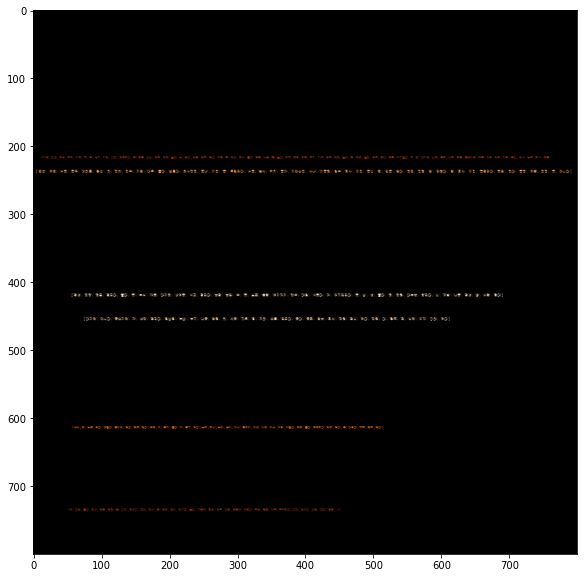

In [111]:
import matplotlib.pyplot as plt
#명사, 동사, 형용사, 부사로 워드클라우드
font_path = '본인 컴퓨터의 폰트 경로'
wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.show()

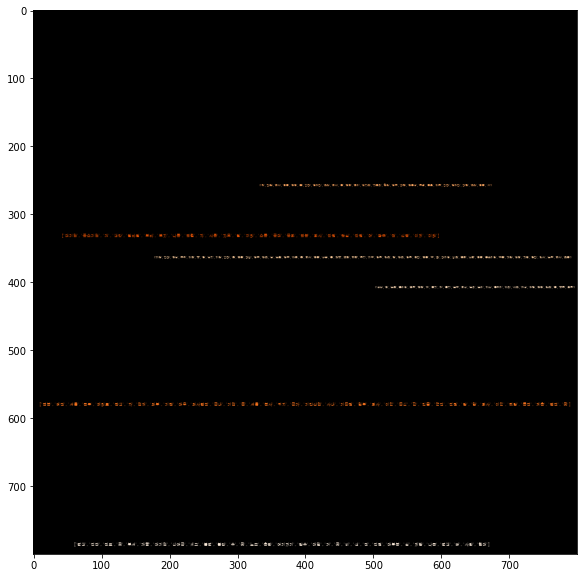

In [112]:
#명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.show()

In [113]:
data.to_csv("data_군집분석전.csv", encoding='utf-8-sig')
data.to_pickle('data_군집분석전.pkl')

In [114]:
data1

["['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', '복지', '곳', '편', '회사', '시스템', '비', '효율', '부분', '업', '무량', '많다', '편이', '그냥', '간단하다', '더', '소통', '좋다']",
 "['자유롭다', '복장', '분위기', '편하다', '좋다', '업무', '당연하다', '강도', '부분', '편하다', '분위기', '좋다', '근무', '환경', '중요시', '생각', '물리', '근무', '환경', '좋다', '깔끔하다', '그렇다', '느낌', '마음', '님', '호칭', '좋다', '내부', '업무', '대한', '부담', '갖', '수', '없다', '급여', '입장', '당연하다', '감당', '몫', '생각', '계약', '직', '정규직', '전환', '대한', '기회', '아쉽다', '계약', '종료', '업무', '애정', '가지', '임', '더', '나은', '기회', '좋다']",
 "['워', '밸', '성장', '동시', '수', '안되다', '기업', '앞', '가장', '전망', '좋다', '플랫폼', '임밸류', '건전하다', '문화', '좋다', '의미', '성과', '제도', '기업', '커서', '주니어', '역할', '제한', '나이', '사람', '많다', '성장하다', '사람', '충분하다', '기회', '인물', '임']",
 "['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중', '수', '보상', '복지', '좋다', '케바케', '용량', '트래픽', '서비스', '운영', '땜', '장애', '민감하다', '대응', '피곤하다', '함', '업계', '위답', '보상', '더', '높다', '좋다', '이름', '카라', '쿠배', '보상', '이제', '아니다']",
 "['아르바이트', '생', '꿈', '직장', '이란', '이렇다', '수', '휴가', '연차', '복지', '눈치

In [115]:
data2

["['커리어', '경력', '사람', '추천', '수평', '사무실', '분위기', '복지', '곳', '편', '회사', '시스템', '비', '효율', '부분', '업', '무량', '많다', '편이', '그냥', '간단하다', '더', '소통', '좋다']",
 "['자유롭다', '복장', '분위기', '편하다', '좋다', '업무', '당연하다', '강도', '부분', '편하다', '분위기', '좋다', '근무', '환경', '중요시', '생각', '물리', '근무', '환경', '좋다', '깔끔하다', '그렇다', '느낌', '마음', '님', '호칭', '좋다', '내부', '업무', '대한', '부담', '갖', '수', '없다', '급여', '입장', '당연하다', '감당', '몫', '생각', '계약', '직', '정규직', '전환', '대한', '기회', '아쉽다', '계약', '종료', '업무', '애정', '가지', '임', '더', '나은', '기회', '좋다']",
 "['워', '밸', '성장', '동시', '수', '안되다', '기업', '앞', '가장', '전망', '좋다', '플랫폼', '임밸류', '건전하다', '문화', '좋다', '의미', '성과', '제도', '기업', '커서', '주니어', '역할', '제한', '나이', '사람', '많다', '성장하다', '사람', '충분하다', '기회', '인물', '임']",
 "['개발자', '영향력', '발휘', '곳', '업계', '위', '개발', '집중', '수', '보상', '복지', '좋다', '케바케', '용량', '트래픽', '서비스', '운영', '땜', '장애', '민감하다', '대응', '피곤하다', '함', '업계', '위답', '보상', '더', '높다', '좋다', '이름', '카라', '쿠배', '보상', '이제', '아니다']",
 "['아르바이트', '생', '꿈', '직장', '이란', '이렇다', '수', '휴가', '연차', '복지', '눈치

##### 군집분석 - Clustering(Actor 도출)

tf-idf

In [116]:
for i in data1:
    if len(i) < 10:
        print(len(i))

2
2
2
2
2


In [122]:
data1[0][0]

'['

In [118]:
data3 = []
for i in data1:
    if len(i) == 0 :
        continue
    string = i[0]
    for w in i[1:]: #첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " " #단어 사이는 띄어쓰기로 연결
        string += w #(띄어쓰기 후 다음 단어) 써주기를 반복
    data3.append(string)
data3#쉼표를 기준으로 document가 구분됨(,)

["[ ' 커 리 어 ' ,   ' 경 력 ' ,   ' 사 람 ' ,   ' 추 천 ' ,   ' 수 평 ' ,   ' 사 무 실 ' ,   ' 분 위 기 ' ,   ' 복 지 ' ,   ' 곳 ' ,   ' 편 ' ,   ' 회 사 ' ,   ' 시 스 템 ' ,   ' 비 ' ,   ' 효 율 ' ,   ' 부 분 ' ,   ' 업 ' ,   ' 무 량 ' ,   ' 많 다 ' ,   ' 편 이 ' ,   ' 그 냥 ' ,   ' 간 단 하 다 ' ,   ' 더 ' ,   ' 소 통 ' ,   ' 좋 다 ' ]",
 "[ ' 자 유 롭 다 ' ,   ' 복 장 ' ,   ' 분 위 기 ' ,   ' 편 하 다 ' ,   ' 좋 다 ' ,   ' 업 무 ' ,   ' 당 연 하 다 ' ,   ' 강 도 ' ,   ' 부 분 ' ,   ' 편 하 다 ' ,   ' 분 위 기 ' ,   ' 좋 다 ' ,   ' 근 무 ' ,   ' 환 경 ' ,   ' 중 요 시 ' ,   ' 생 각 ' ,   ' 물 리 ' ,   ' 근 무 ' ,   ' 환 경 ' ,   ' 좋 다 ' ,   ' 깔 끔 하 다 ' ,   ' 그 렇 다 ' ,   ' 느 낌 ' ,   ' 마 음 ' ,   ' 님 ' ,   ' 호 칭 ' ,   ' 좋 다 ' ,   ' 내 부 ' ,   ' 업 무 ' ,   ' 대 한 ' ,   ' 부 담 ' ,   ' 갖 ' ,   ' 수 ' ,   ' 없 다 ' ,   ' 급 여 ' ,   ' 입 장 ' ,   ' 당 연 하 다 ' ,   ' 감 당 ' ,   ' 몫 ' ,   ' 생 각 ' ,   ' 계 약 ' ,   ' 직 ' ,   ' 정 규 직 ' ,   ' 전 환 ' ,   ' 대 한 ' ,   ' 기 회 ' ,   ' 아 쉽 다 ' ,   ' 계 약 ' ,   ' 종 료 ' ,   ' 업 무 ' ,   ' 애 정 ' ,   ' 가 지 ' ,   ' 임 ' ,   ' 더 ' ,   ' 나 은 ' ,   ' 기 회 ' ,   ' 좋 다 ' ]",


In [119]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
from collections import defaultdict
word2id = defaultdict(lambda:0) #value가 없는 key인 경우 error 대신 0을 출력

In [ ]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature]=idx

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf=[]
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])

In [ ]:
tfidf[4]

[('아르바이트', 0.1733936762642735),
 ('생', 0.0),
 ('꿈', 0.0),
 ('직장', 0.12740841190897595),
 ('이란', 0.24739070124010593),
 ('이렇다', 0.1623800408754496),
 ('수', 0.0),
 ('휴가', 0.12644358080057225),
 ('연차', 0.09002806407837356),
 ('복지', 0.06234436375681528),
 ('눈치', 0.10003945538081774),
 ('전혀', 0.1606098105422767),
 ('없다', 0.18003095297142202),
 ('자율', 0.12918168427251717),
 ('자체', 0.14483825332306705),
 ('밥', 0.0),
 ('시설', 0.1504376135180848),
 ('좋다', 0.04772249880583062),
 ('최고', 0.11067487608340354),
 ('환경', 0.31597020096319656),
 ('일만', 0.16068485481493935),
 ('분위기', 0.07744870748657447),
 ('위치', 0.1467284110865677),
 ('분당', 0.261425147394503),
 ('점', 0.0),
 ('누군가', 0.22582105212247167),
 ('단점', 0.11830055411426796),
 ('연구원', 0.20733081737847348),
 ('매년', 0.17748334216756922),
 ('재계약', 0.24357429626334423),
 ('통해', 0.1611133244817484),
 ('연봉', 0.07493524721019118),
 ('협상', 0.20536227191686618),
 ('과정', 0.18560702657368275),
 ('실적', 0.14460547383598854),
 ('스트레스', 0.13762609597256198),
 ('

##### 토픽 개수 정하기

In [ ]:
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [ ]:
#from gensim import corpora, models

dictionary = corpora.Dictionary(data1)
dictionary

In [ ]:
#tuple로 mapping해주는 함수, doc2bow
#단어를 index로 mapping, 몇번 나왓는지 
corpus = [dictionary.doc2bow(text)for text in data1]

In [ ]:
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)]]

In [ ]:
import gensim
from gensim.models import CoherenceModel

In [ ]:
#coherence 확인(군집 평가)

#coherenceModel_lda = CoherenceModel(model=lda, texts=data1, dictionary=dictionary, topn=10)
#coherence_model_lda.get_coherence()

In [ ]:
values=[]
for i in range(2, 10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    #                           혼잡도 낮을수록 좋음
    values.append(ldamodel.log_perplexity(corpus))

Text(0, 0.5, 'Score')

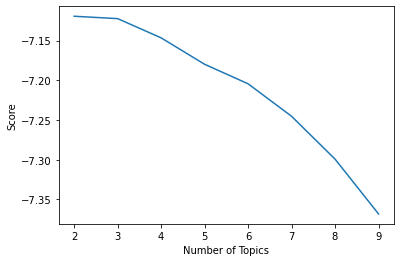

In [ ]:
x = range(2, 10)
plt.plot(x, values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

In [ ]:
from gensim.models import CoherenceModel
coherence_values = []
for i in range(2, 10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i,id2word=dictionary)

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data1, dictionary=dictionary, topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)




Text(0, 0.5, 'Score')

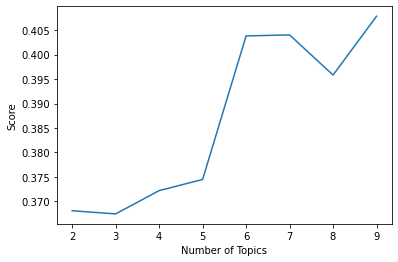

In [ ]:
x=range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                              num_topics=i,
                                              id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel,
                                        texts = data1,
                                        dictionary=dictionary,
                                        topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


##### 워드클라우드

In [120]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [121]:
sp_matrix1 = vectorizer.fit_transform(data3)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#                                           10개로 변경
cluster = AgglomerativeClustering(n_clusters=10, linkage='ward')

In [ ]:
len(data)

60573

In [ ]:
result = cluster.fit_predict(df1)

In [ ]:
df_ward = data.copy()

In [ ]:
df_ward['클러스터'] = list(result)

In [ ]:
df_ward

,time,review,comment,like,url,doc,token,text_noun,클러스터
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 위...,"[생활, 결혼식, 답례, 품, 후기, 추천, 꾸다, 프리미엄, 비건, 쿠키, 디저트...","[생활, 결혼식, 답례, 품, 후기, 추천, 프리미엄, 비건, 쿠키, 디저트, 이안...",2
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 일차 맛있으면 안되는데 키메랩 생각보다 비건채식 맛있게 먹을 것이 정말 많...,"[일지, 일차, 맛있다, 안되다, 키메, 랩, 생각, 비건, 채식, 맛있다, 먹다,...","[일지, 일차, 키메, 랩, 생각, 비건, 채식, 정말, 한식, 전, 건선, 극단,...",2
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 위치스윗밸런스 교대역...,"[맛집, 멋지다, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, ...","[맛집, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, 퍼피, 위...",2
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514,맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...,"[맘, 메이크, 선, 바쁘다, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민,...","[맘, 메이크, 선, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민, 내면, ...",0
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680,베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...,"[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 새다, 리, 가지, 채소...","[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 리, 가지, 채소, 올리...",2
...,...,...,...,...,...,...,...,...,...
945,2021. 5. 6. 17:17,빵만먹고살고싶다 [마켓컬리빵]비건베이커리로 유명한 연남동...,[],[],https://blog.naver.com/jimin5077/222340294244,빵만먹고살고싶다 마켓컬리빵 비건베이커리로 유명한 연남동 빵어니스타 마켓컬리 주문 ...,"[빵, 먹고살다, 마켓, 컬리, 빵, 비건, 베이커리, 유명하다, 연남동, 빵, 스...","[빵, 마켓, 컬리, 빵, 비건, 베이커리, 연남동, 빵, 스타, 마켓, 컬리, 주...",1
946,2022. 4. 4. 23:02,일상 다이어트 식단기록 76 / 77일차 O리...,[],10,https://blog.naver.com/sj330035/222691733289,일상 다이어트 식단기록 일차 리 다이어트 일차 다이어트 식단기록 일차 아침 식단...,"[일상, 다이어트, 식단, 기록, 일차, 리, 다이어트, 일차, 다이어트, 식단, ...","[일상, 다이어트, 식단, 기록, 일차, 리, 다이어트, 일차, 다이어트, 식단, ...",1
947,2022. 4. 1. 11:39,업계 트랜드 분석 '22.4.1(금) F&B 뉴스 클리핑 ...,[],4,https://blog.naver.com/pulmuonefnc/222688754395,업계 트랜드 분석 금 뉴스 클리핑 푸드앤로그 삼성 압수수색 시작은 구내식당 일감...,"[업계, 트, 랜드, 분석, 금, 뉴스, 크다, 리핑, 푸드, 앤, 로그, 삼성, ...","[업계, 트, 랜드, 분석, 금, 뉴스, 리핑, 푸드, 앤, 로그, 삼성, 압수수색...",2
948,2021. 3. 6. 17:05,카페 거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집 ...,[],8,https://blog.naver.com/h_yuri931017/222266408609,카페 거제카페추천 프릴메이 아주동카페 비건빵집 율로그 위치프릴메이 프릴메이 더보...,"[카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...","[카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...",1


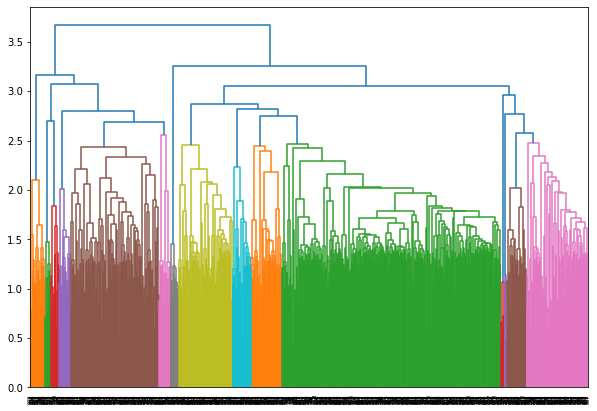

In [ ]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

In [ ]:
#파일 저장
import pickle
df_ward.to_pickle('기업데이터(30)_clustering.pkl')
df_ward.to_csv('기업데이터(30)_clustering.csv', encoding='utf-8-sig')